In [1]:
import torch
from torchvision.transforms import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 * 256, 128)  # Assuming input images are RGB and 256x256
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output layer with 2 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)  # Flatten the input images
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x


In [13]:
model = SimpleNN()

model.load_state_dict(torch.load('binary_classfication_model.pth'))
model.eval()


C:\Users\ACER\AppData\Local\Temp\ipykernel_25108\277772841.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('binary_classfication_model.p

SimpleNN(
  (fc1): Linear(in_features=196608, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [15]:

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [25]:
image_path = r'Flowers_Classification_dataset/test/dandelion/13900486390_5a25785645_n_jpg.rf.5acbcf6d2eb7f5ebfe536eb1276896bb.jpg'  # Replace with the path to your unseen image
image = Image.open(image_path)

input_tensor = transform(image).unsqueeze(0)  # Add an extra dimension for batch size
print(input_tensor.shape)


torch.Size([1, 3, 256, 256])


In [27]:
with torch.no_grad():
    model_output = model(input_tensor)


# Interpret the model output
_, predicted_class = torch.max(model_output, 1)
print(predicted_class)

tensor([1])


In [29]:
class_labels = ['daisy','dandelion']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class.item()]

print(f'The model predicts that the image belongs to class: {predicted_class_label}')

The model predicts that the image belongs to class: dandelion


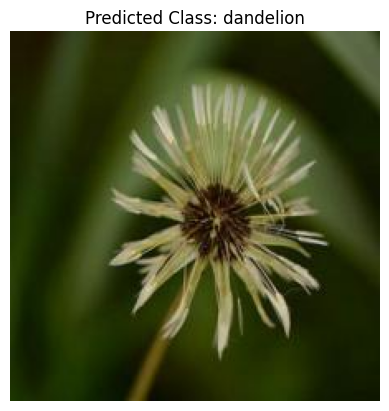

In [31]:
import numpy as np
# Display the image along with the predicted class
image_array = np.array(image)
plt.imshow(image_array)
plt.title(f'Predicted Class: {predicted_class_label}')
plt.axis('off')
plt.show()
